In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,SeparableConv2D,DepthwiseConv2D,Input
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import regularizers
from keras.layers.merge import concatenate

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
img_height, img_width, channel = train_features.shape[1],train_features.shape[2],train_features.shape[3]
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

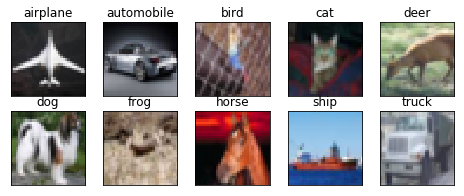

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
W0619 12:26:57.753722 140251368216448 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Upda

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_34 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_35 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 14s 36ms/step - loss: 1.8789 - acc: 0.2828 - val_loss: 1.5176 - val_acc: 0.4435
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.3778 - acc: 0.4968 - val_loss: 1.1523 - val_acc: 0.5889
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1477 - acc: 0.5949 - val_loss: 0.9897 - val_acc: 0.6434
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9995 - acc: 0.6482 - val_loss: 0.8578 - val_acc: 0.7018
Epoch 5/100
390/390 [==============================] - 9s 24ms/step - loss: 0.8887 - acc: 0.6895 - val_loss: 0.8293 - val_acc: 0.7166
Epoch 6/100
390/390 [==============================] - 9s 24ms/step - loss: 0.8189 - acc: 0.7178 - val_loss: 0.7409 - val_acc: 0.7439
Epoch 7/100
390/390 [==============================] - 9s 24ms/step - loss: 0.7515 - acc: 0.7419 - val_loss: 0.6996 - val_acc: 0.7624
Epoch 8/100
390/390 [==============================] - 9s 24m

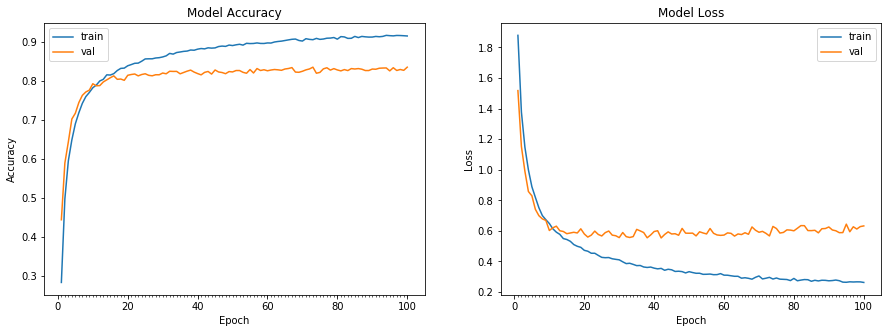

Accuracy on test data is: 83.47


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Assignment-6A**

In [0]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(96, 3, 3, border_mode='same',  kernel_regularizer=regularizers.l2(0.001),input_shape=(32, 32, 3))) ## RF 3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## RF 5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## RF 7x7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1 , kernel_regularizer=regularizers.l2(0.001))) ## 7x7 
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 14x14
model.add(Dropout(0.025))
model.add(Convolution2D(96, 3, 3 , kernel_regularizer=regularizers.l2(0.001), border_mode='same')) ## rf 16x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 , kernel_regularizer=regularizers.l2(0.001), border_mode='same')) ## rf 18x18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## rf 20x20
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1 , kernel_regularizer=regularizers.l2(0.001))) ## rf 20x20
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 40x40
model.add(Dropout(0.025))
model.add(Convolution2D(96, 3, 3 , kernel_regularizer=regularizers.l2(0.001), border_mode='same')) ## rf 42x42
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 , kernel_regularizer=regularizers.l2(0.001), border_mode='same')) ## rf 44x44
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## rf 46x46
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1 , kernel_regularizer=regularizers.l2(0.001))) ## rf 46x46
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 92x92
model.add(Dropout(0.025))
model.add(Convolution2D(96, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## rf 94x94
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## rf 96x96
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same')) ## rf 98x98
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1 , kernel_regularizer=regularizers.l2(0.001))) ## rf 98x98
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 196x196
model.add(Dropout(0.025))
model.add(Convolution2D(40, 1 , kernel_regularizer=regularizers.l2(0.001))) ## rf 198x198
model.add(MaxPooling2D(pool_size=(2, 2))) ## rf 396x396
model.add(BatchNormalization())
model.add(Convolution2D(10, 1 , kernel_regularizer=regularizers.l2(0.001)))  ## rf 398x398
##model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (1, 1), kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_163 (Conv2D)          (None, 32, 32, 96)        2688      
_________________________________________________________________
batch_normalization_124 (Bat (None, 32, 32, 96)        384       
_________________________________________________________________
activation_118 (Activation)  (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 32, 32, 96)        83040     
_________________________________________________________________
batch_normalization_125 (Bat (None, 32, 32, 96)        384       
_________________________________________________________________
activation_119 (Activation)  (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 32, 32, 192)       166080    
__________

In [0]:
datagen = ImageDataGenerator(zoom_range=0.20, 
                             featurewise_center=True,
                             featurewise_std_normalization=True,
                             horizontal_flip=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=97, epochs=99)`
  """
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDa

Epoch 1/99
97/97 [==============================] - 42s 438ms/step - loss: 0.6188 - acc: 0.9198 - val_loss: 0.9197 - val_acc: 0.8286
Epoch 2/99
97/97 [==============================] - 41s 421ms/step - loss: 0.6161 - acc: 0.9211 - val_loss: 1.2192 - val_acc: 0.7403
Epoch 3/99
97/97 [==============================] - 41s 427ms/step - loss: 0.6258 - acc: 0.9184 - val_loss: 1.5244 - val_acc: 0.6784
Epoch 4/99
97/97 [==============================] - 41s 424ms/step - loss: 0.6153 - acc: 0.9206 - val_loss: 1.1133 - val_acc: 0.7640
Epoch 5/99
97/97 [==============================] - 41s 424ms/step - loss: 0.6102 - acc: 0.9212 - val_loss: 1.2447 - val_acc: 0.7511
Epoch 6/99
97/97 [==============================] - 41s 425ms/step - loss: 0.6110 - acc: 0.9224 - val_loss: 1.2295 - val_acc: 0.7406
Epoch 7/99
97/97 [==============================] - 41s 425ms/step - loss: 0.6159 - acc: 0.9210 - val_loss: 1.1566 - val_acc: 0.7732
Epoch 8/99
97/97 [==============================] - 41s 424ms/step - 

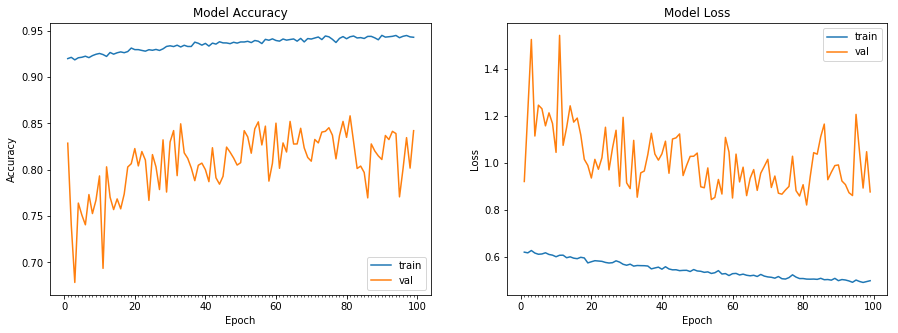

Accuracy on test data is: 84.21


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 512),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 99, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Assignment-6B**

In [0]:
input1 = Input(shape=(img_height, img_width, channel)) ## define input
print(input1.shape)
type(input1)

(?, 32, 32, 3)


tensorflow.python.framework.ops.Tensor

In [0]:
# Define a functional model
## first convolution layer
layer1_x = (Convolution2D(48, 3, 3, border_mode='same',  kernel_regularizer=regularizers.l2(0.001)))(input1) ## rf 3x3, cs 46X46
layer1_x = (BatchNormalization())(layer1_x) 
layer1_x = (Activation('relu'))(layer1_x) 
## define spatially seperable layer
layer1_x = (Convolution2D(48, 3, 1 , kernel_regularizer=regularizers.l2(0.001),border_mode='same'))(layer1_x) 
layer1_x = (Convolution2D(48, 1, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same'))(layer1_x) ## rf 5x5, cs 46x46
layer1_x = (BatchNormalization())(layer1_x)
layer1_x = (Activation('relu'))(layer1_x)
## define depthwise seperable layer
layer1_x = (SeparableConv2D(48,(3,3),  padding='same', data_format=None, dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=False, depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform'))(layer1_x) ## rf 7x7, cs 46x46
layer1_x = (BatchNormalization())(layer1_x)
layer1_x = (Activation('relu'))(layer1_x)
## Define 3x3 conv layer
layer1_x = (Convolution2D(48, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same'))(layer1_x) ##  rf 9x9, cs 46x46
layer1_x = (BatchNormalization())(layer1_x)
layer1_x = (Activation('relu'))(layer1_x)
## Define a bottleneck layer
layer1_x = (Convolution2D(10, 1 , kernel_regularizer=regularizers.l2(0.001), border_mode='same'))(layer1_x) ##  rf 9x9, cs 46x46
layer1_x = (MaxPooling2D(pool_size=(2, 2)))(layer1_x)  ## rf 18x18, cs 23x23
layer1_x = (BatchNormalization())(layer1_x)
layer1_x = (Activation('relu'))(layer1_x)
## define spatially seperable layer
layer1_x = (Convolution2D(48, 3, 1 , kernel_regularizer=regularizers.l2(0.001),border_mode='same'))(layer1_x)
layer1_x = (Convolution2D(48, 1, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same'))(layer1_x) ##  rf 20x20, cs 23x23
layer1_x = (BatchNormalization())(layer1_x)
layer1_x = (Activation('relu'))(layer1_x)
## define depthwise seperable layer
layer1_x = (SeparableConv2D(48,(3,3),  padding='same', data_format=None, dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=False, depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform'))(layer1_x) ##  rf 22x22, cs 23x23
layer1_x = (BatchNormalization())(layer1_x)
layer1_x = (Activation('relu'))(layer1_x)
## define  3x3 conv layers
layer1_x = (Convolution2D(48, 3, 3 , kernel_regularizer=regularizers.l2(0.001),border_mode='same'))(layer1_x) ##  rf 24x24, cs 23x23
layer1_x = (BatchNormalization())(layer1_x)
layer1_x = (Activation('relu'))(layer1_x)
layer1_x = (Convolution2D(48, 3,3 , kernel_regularizer=regularizers.l2(0.001), border_mode='same'))(layer1_x) ##  rf 26x26, cs 23x23
layer1_x = (MaxPooling2D(pool_size=(2, 2)))(layer1_x)  ##  rf 52x52, cs 12x12
layer1_x = (BatchNormalization())(layer1_x)
layer1_x = (Activation('relu'))(layer1_x)
layer1_x = (Convolution2D(40, 3,3 , kernel_regularizer=regularizers.l2(0.001), border_mode='same'))(layer1_x) ## rf 28x28, cs 21x21
layer1_x = (MaxPooling2D(pool_size=(2, 2)))(layer1_x) ## rf 56x56, cs 10x10
layer1_x = (BatchNormalization())(layer1_x)
layer1_x = (Activation('relu'))(layer1_x)
## define  group convolution layer of 3x3 and 5x5
layer1_x_1 = (Convolution2D(10, 3 , kernel_regularizer=regularizers.l2(0.001), strides=(1,1), padding='same', use_bias=False))(layer1_x) ## rf 58x58, cs 10x10
layer1_x_2 = (Convolution2D(10, 5 , kernel_regularizer=regularizers.l2(0.001), strides=(1,1), padding='same', use_bias=False))(layer1_x)  ## rf 63x63, cs 10x10
layer1_x = concatenate([layer1_x_1,layer1_x_2])  ## concatenate
layer1_x = (MaxPooling2D(pool_size=(2, 2)))(layer1_x) ## rf 126x126, cs 5x5
layer1_x = (BatchNormalization())(layer1_x)
## define  group convolution of two 3x3 layers with dilation_rate 1 & 2
layer1_x_3 = (Convolution2D(10, 3 , kernel_regularizer=regularizers.l2(0.001), dilation_rate = 1,strides=(1,1), padding='same', use_bias=False))(layer1_x) ## rf 128x128, cs 5x5
layer1_x_4 = (Convolution2D(10, 3 , kernel_regularizer=regularizers.l2(0.001), dilation_rate = 2,strides=(1,1), padding='same', use_bias=False))(layer1_x) ## rf 130x130, cs 5x5
layer1_x = concatenate([layer1_x_3,layer1_x_4]) ## concatenate
layer1_x = (MaxPooling2D(pool_size=(2, 2)))(layer1_x) ## ## rf 260x260, cs 2x2
layer1_x = (BatchNormalization())(layer1_x)
layer1_x = (Convolution2D(10, 3 , kernel_regularizer=regularizers.l2(0.001), border_mode='same'))(layer1_x)  ## rf 262x262, cs 1x1
layer1_x = (BatchNormalization())(layer1_x)
layer1_x = (Convolution2D(10, 1 , kernel_regularizer=regularizers.l2(0.001), border_mode='same'))(layer1_x)
layer1_x = (BatchNormalization())(layer1_x)
layer1_x = (Flatten())(layer1_x)
layer1_x = (Activation('softmax'))(layer1_x)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 1), kernel_regularizer=<keras.reg..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, 1, kernel_regularizer=<keras.reg..., padding="same"

In [0]:
model = Model(inputs=[input1], outputs=[layer1_x])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_55 (Conv2D)              (None, 32, 32, 48)   1344        input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_43 (BatchNo (None, 32, 32, 48)   192         conv2d_55[0][0]                  
__________________________________________________________________________________________________
activation_42 (Activation)      (None, 32, 32, 48)   0           batch_normalization_43[0][0]     
__________________________________________________________________________________________________
conv2d_56 

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(zoom_range=0.0, 
                             featurewise_center=True,
                             featurewise_std_normalization=True,
                             horizontal_flip=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=97, epochs=50)`
  """


Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


97/97 [==============================] - 28s 287ms/step - loss: 2.3139 - acc: 0.3329 - val_loss: 2.1804 - val_acc: 0.3648
Epoch 2/50
97/97 [==============================] - 17s 171ms/step - loss: 1.8775 - acc: 0.4983 - val_loss: 1.9996 - val_acc: 0.4452
Epoch 3/50
97/97 [==============================] - 16s 162ms/step - loss: 1.6637 - acc: 0.5759 - val_loss: 2.1392 - val_acc: 0.3853
Epoch 4/50
97/97 [==============================] - 16s 164ms/step - loss: 1.4922 - acc: 0.6364 - val_loss: 1.6764 - val_acc: 0.5641
Epoch 5/50
97/97 [==============================] - 16s 162ms/step - loss: 1.3431 - acc: 0.6822 - val_loss: 1.6071 - val_acc: 0.5842
Epoch 6/50
97/97 [==============================] - 16s 160ms/step - loss: 1.2303 - acc: 0.7150 - val_loss: 1.5199 - val_acc: 0.6055
Epoch 7/50
97/97 [==============================] - 15s 160ms/step - loss: 1.1272 - acc: 0.7448 - val_loss: 1.3548 - val_acc: 0.6623
Epoch 8/50
97/97 [==============================] - 15s 160ms/step - loss: 1.048

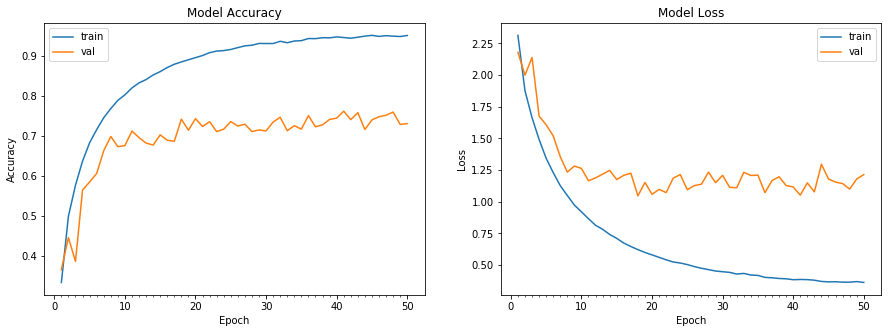

Accuracy on test data is: 73.04


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 512),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))